In [1]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.sentiment

import nltk.sentiment

from env import get_connection_url

1. Spam Data

    a. Load the spam data set.
    
    
    b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    
    yes as shown by the frequency table.
    
    
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    
    
    
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
url = get_connection_url('spam_db')

In [3]:
query = '''
SELECT *
FROM spam
'''

In [4]:
df = pd.read_sql(query, url, index_col = 'id')

In [5]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', '4', 'ltgt']

def clean(text):
    '''
    A simple function to cleanup text data. 
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
        
    '''
    
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    
    words = re.sub(r'[^\w\s]', '', text).split()
    
    wn1 = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    cleaned_words = [wn1.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [7]:
#join is used so that it the words associated with 'ham' can be cleaned efficently

ham_words = clean(' '.join(df[df.label=="ham"]['text']))
spam_words = clean(' '.join(df[df.label=="spam"]['text']))
all_words = clean(' '.join(df['text']))

In [8]:
#checking, at a quick glance, if there any phrases I feel should be included in the "ADDITIONAL WORDS" LIST

ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [9]:
#checking, at a quick glance, if there any phrases I feel should be included in the "ADDITIONAL WORDS" lisat
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'a900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'a100000',
 'pr

In [10]:
#combining all three values allows us to see crossover of words between spam and ham
#why is there any cross overs unless these words were not stopwords and exist in both

#create and save frequency items
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

,0,1,2
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


In [12]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

word_counts.columns = ['ham', 'spam', 'all']

word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [13]:

word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
ur,240,144,384
go,273,31,304
dont,257,22,279
ok,272,5,277
free,59,216,275
know,241,26,267
come,242,5,247


In [14]:
word_counts.all()

ham     False
spam    False
all      True
dtype: bool

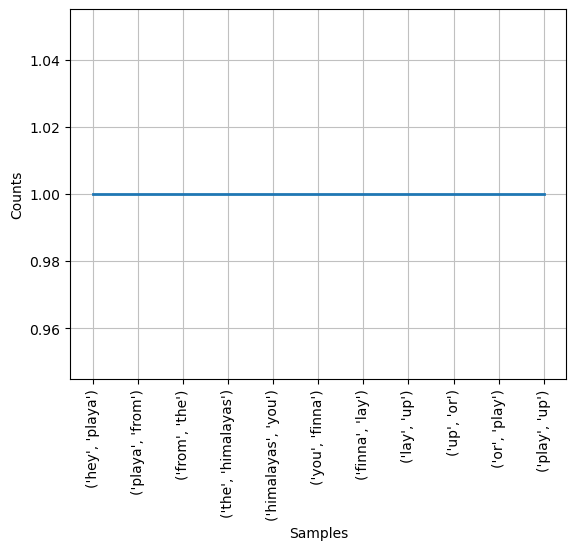

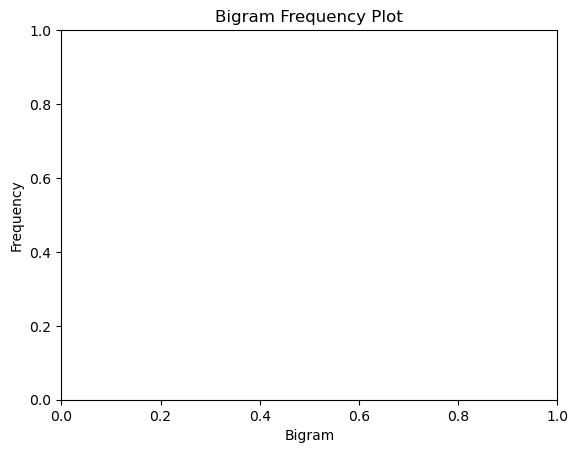

In [15]:
from nltk import bigrams

text_corpus = "hey playa from the himalayas you finna lay up or play up"

# Generate bigrams
tokens = nltk.word_tokenize(text_corpus)
bigram_tokens = list(bigrams(tokens))

# Calculate frequency distribution of bigrams
freq_dist = nltk.FreqDist(bigram_tokens)

# Plot bigram frequencies
freq_dist.plot(30)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Bigram Frequency Plot')
plt.show()

<AxesSubplot:>

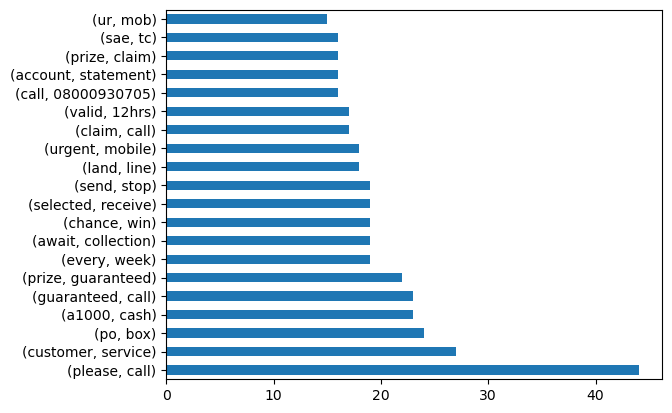

In [16]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(20).plot.barh()

In [17]:
top_20_spam = pd.Series(nltk.bigrams(spam_words)).value_counts().head(20)
top_20_spam

In [18]:
top_20_ham = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)
top_20_ham

In [ ]:
top_20_ham.to_dict()

In [ ]:
top_20_spam.to_dict()

In [ ]:
{k[0]+' '+k[1]: v for k, v in top_20_spam.to_dict().items()}

In [19]:
spam_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_spam.to_dict().items()}
spam_bigram_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(spam_bigram_data)

plt.figure(figsize=(10,6))
plt.imshow(spam_bigram_img)
plt.axis("off")
plt.title("spam bigrams word cloud")
plt.show()

TypeError: expected string or bytes-like object

In [ ]:
def plot_bigrams(words):
    word_data = {k[0]+' '+k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(word_data)

    plt.figure(figsize=(10,6))
    plt.imshow(word_img)
    
    plt.axis("off")
    plt.show()

In [ ]:
ham_bigram_data = {k[0]+' '+k[1]: v for k, v in top_20_ham.to_dict().items()}
ham_bigram_data

In [ ]:
overlay_list = [bigram for bigram in top_20_spam.keys() if bigram in top_20_ham.keys()]
overlay_list

In [ ]:
top_20_spam_trigrams = make_ngrams(spam_words, 3)
top_20_spam_trigrams

In [ ]:
top_20_spam_trigrams.plot.barh(width=.9, figsize=(12,8))


In [ ]:
spam_trigram_data = {k[0]+ ' '+k[1]+ ' '+k[2]: v for k,v in top_20_spam_trigrams.to_dict().items()}
spam_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_trigram_img)
plt.axis('off')
plt.show()


3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [ ]:
news_df = pd.read_json('news_articles.json')
news_df = news_df.rename(columns={'content':'original'}).drop(columns=['title'])

news_df['clean'] = news_df.original.apply(w.basic_clean).apply(w.tokenize).apply(w.remove_stopwords)
news_df['stem'] = news_df.clean.apply(w.stem)
news_df['lemmatized'] = news_df.clean.apply(w.lemmatize)
news_df.head()

In [ ]:
business_words = list(' '.join(news_df[news_df['category'] == 'business']['lemmatized']).split())
business_words[:3]


In [ ]:
sports_words = list(' '.join(news_df[news_df['category'] == 'sports']['lemmatized']).split())
technology_words = list(' '.join(news_df[news_df['category'] == 'technology']['lemmatized']).split())
entertainment_words = list(' '.join(news_df[news_df['category'] == 'entertainment']['lemmatized']).split())

In [ ]:
sports_top_20 = pd.Series(sports_words).value_counts().head(20)
technology_top_20 = pd.Series(technology_words).value_counts().head(20)
entertainment_top_20 = pd.Series(entertainment_words).value_counts().head(

In [ ]:
business_top_20 = business_top_20.drop("'")
sports_top_20 = sports_top_20.drop("'")
technology_top_20 = technology_top_20.drop("'")
entertainment_top_20 = entertainment_top_20.drop("'")

In [ ]:
top_words = pd.concat([pd.DataFrame(business_top_20).reset_index(),
                       pd.DataFrame(sports_top_20).reset_index(),
                       pd.DataFrame(technology_top_20).reset_index(),
                       pd.DataFrame(entertainment_top_20).reset_index()])

In [ ]:
top_words.rename(columns={'index': 'word', 0: 'count'}, inplace=True)


In [ ]:
top_words['word'].value_counts().head(20)


In [ ]:
for word in list(business_top_20.index):
    
    if word in list(technology_top_20.index):
        
        print('Match found with word: {}!'.format(word))
        
    else:
        
        continue

In [ ]:
business_bigrams = make_ngrams(business_words, 2)
sports_bigrams = make_ngrams(sports_words, 2)
technology_bigrams = make_ngrams(technology_words, 2)
entertainment_bigrams = make_ngrams(entertainment_words, 2)

In [ ]:
plot_bigrams(business_bigrams)


In [ ]:
plot_bigrams(sports_bigrams)


In [ ]:
plot_bigrams(technology_bigrams)
